In [2]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import sklearn
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [5]:
df = pd.read_csv('PJME_hourly.csv')
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [6]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


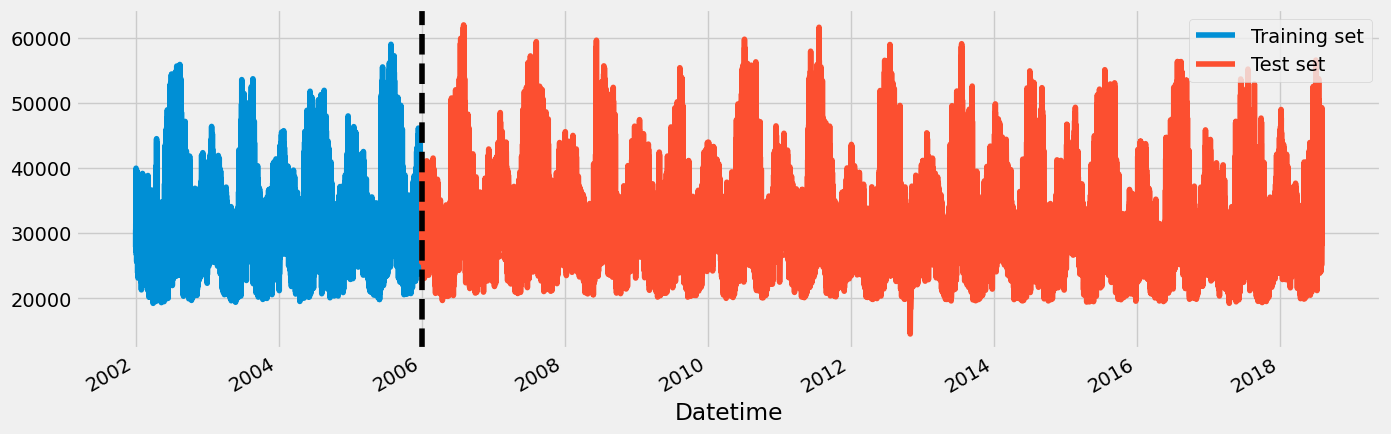

In [10]:
train = df.loc[df.index<'01-01-2006']
test = df.loc[df.index>='01-01-2006']

fig, ax = plt.subplots(figsize=(15,5))
train.plot (ax=ax, label='Training set')
test.plot (ax=ax, label = 'Test set')
ax.axvline('01-01-2006', color = 'black', ls='--')
ax.legend(['Training set', 'Test set'])
plt.show()

ValueError: too many values to unpack (expected 2)

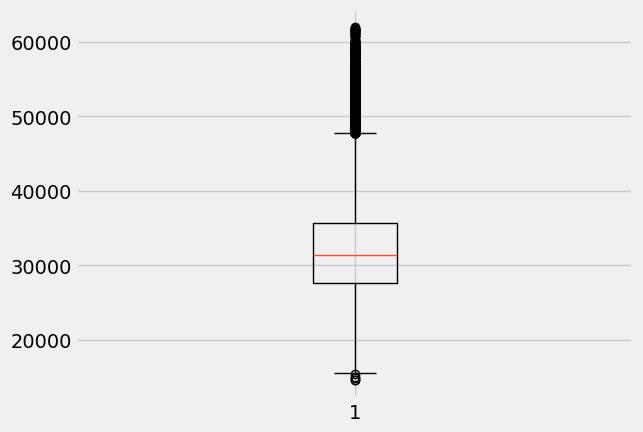

In [14]:
fig, ax = plt.boxplot(df)
train.plot (ax=ax, label='Train s')
test.plot (ax=ax, label = 'Test s')
ax.axvline('01-01-2010', color = 'red', ls='--')
ax.legend(['Train s', 'Test s'])
plt.show()

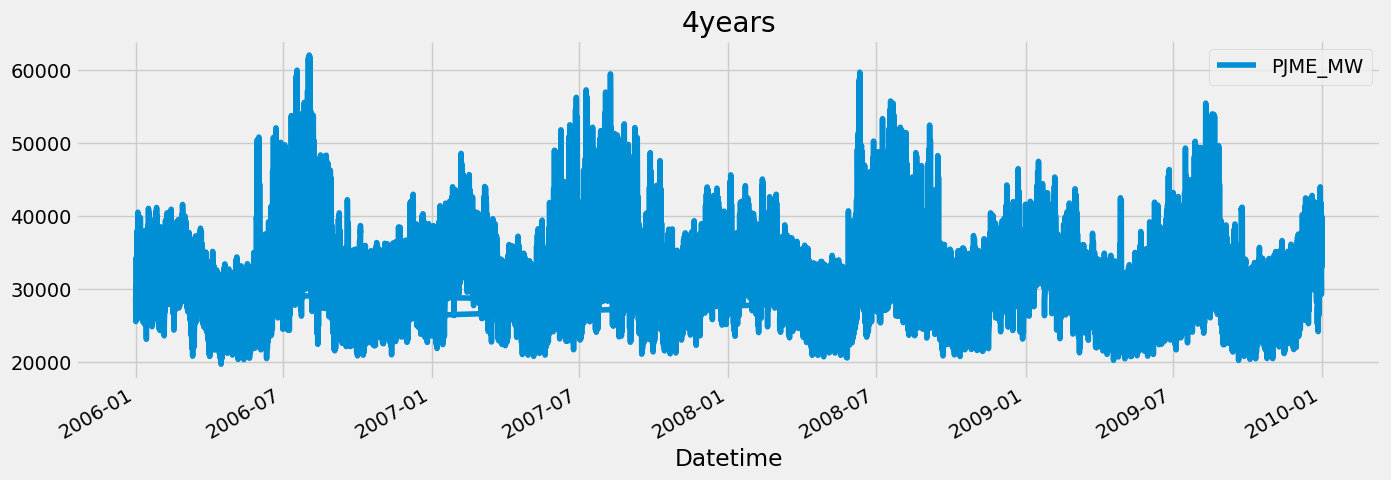

In [16]:
df.loc[(df.index>'01-01-2006')&(df.index<'01-01-2010')].plot(figsize=(15,5), title='4years')
plt.show()


In [17]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [18]:
df.index.hour

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
       ...
       15, 16, 17, 18, 19, 20, 21, 22, 23,  0],
      dtype='int32', name='Datetime', length=145366)

In [21]:
df.index.month_name

<bound method _inherit_from_data.<locals>.method of DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=145366, freq=None)>

In [23]:
df.index.second

Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       ...
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype='int32', name='Datetime', length=145366)

In [24]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [25]:
def create_features(df):
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

df = create_features(df)

In [26]:
create_features

<function __main__.create_features(df)>

In [27]:
def create_vnogo(df):
    df['hourly'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    return df

df = create_vnogo(df)

In [32]:
train = create_features(train)
test = create_features(test)

FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
TARGET = 'PJME_MW'



C:\Users\ARCPC-02\AppData\Local\Temp\ipykernel_12040\847293331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df.index.hour
C:\Users\ARCPC-02\AppData\Local\Temp\ipykernel_12040\847293331.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['dayofweek'] = df.index.dayofweek
C:\Users\ARCPC-02\AppData\Local\Temp\ipykernel_12040\847293331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [33]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'hourly'],
      dtype='object')

In [34]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,hourly
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,2
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,3
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,4
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,5


In [41]:
x_train = train[FEATURES]
y_train = train[TARGET]

x_test = test[FEATURES]
y_test = train[TARGET]


In [42]:
df.head()

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear,hourly
Datetime,,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365,1
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365,2
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365,3
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365,4
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365,5


In [37]:
x_train

Datetime
2002-12-31 01:00:00    26498.0
2002-12-31 02:00:00    25147.0
2002-12-31 03:00:00    24574.0
2002-12-31 04:00:00    24393.0
2002-12-31 05:00:00    24860.0
                        ...   
2005-01-01 20:00:00    30536.0
2005-01-01 21:00:00    30175.0
2005-01-01 22:00:00    29478.0
2005-01-01 23:00:00    28174.0
2005-01-02 00:00:00    26368.0
Name: PJME_MW, Length: 35055, dtype: float64

In [38]:
x_test

,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,
2006-01-01 00:00:00,0,6,1,1,2006,1
2006-12-31 01:00:00,1,6,4,12,2006,365
2006-12-31 02:00:00,2,6,4,12,2006,365
2006-12-31 03:00:00,3,6,4,12,2006,365
2006-12-31 04:00:00,4,6,4,12,2006,365
...,...,...,...,...,...,...
2018-01-01 20:00:00,20,0,1,1,2018,1
2018-01-01 21:00:00,21,0,1,1,2018,1
2018-01-01 22:00:00,22,0,1,1,2018,1


In [44]:
reg = xgb.XGBRegressor(n_estimator = 1000, early_stopping_rounds = 50, learning_rate=0.01)
reg.fit(x_train, y_train, eval_set=[(x_train, y_train),(x_test, y_test)],verbose=100)

XGBoostError: [16:45:42] C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\data\data.cc:508: Check failed: this->labels.Size() % this->num_row_ == 0 (35055 vs. 0) : Incorrect size for labels.

In [ ]:
reg.feature_importances_